# Reading a MakeClass Code in SWAN
Including header and launching the file

In [1]:
%%cpp -d
#define ReadSHiPSim_cxx
#include "ReadSHiPSim.h"
#include <TH2.h>
#include <TStyle.h>
#include <TCanvas.h>

void ReadSHiPSim::Loop()
{
//   In a ROOT session, you can do:
//      root> .L ReadSHiPSim.C
//      root> ReadSHiPSim t
//      root> t.GetEntry(12); // Fill t data members with entry number 12
//      root> t.Show();       // Show values of entry 12
//      root> t.Show(16);     // Read and show values of entry 16
//      root> t.Loop();       // Loop on all entries
//

//     This is the loop skeleton where:
//    jentry is the global entry number in the chain
//    ientry is the entry number in the current Tree
//  Note that the argument to GetEntry must be:
//    jentry for TChain::GetEntry
//    ientry for TTree::GetEntry and TBranch::GetEntry
//
//       To read only selected branches, Insert statements like:
// METHOD1:
//    fChain->SetBranchStatus("*",0);  // disable all branches
//    fChain->SetBranchStatus("branchname",1);  // activate branchname
// METHOD2: replace line
//    fChain->GetEntry(jentry);       //read all branches
//by  b_branchname->GetEntry(ientry); //read only this branch
   if (fChain == 0) return;

   Long64_t nentries = fChain->GetEntriesFast();

   Long64_t nbytes = 0, nb = 0;
   //defining histograms 
   TFile *outputfile = new TFile("savingtesthisto.root","RECREATE");
   TH1D *htesthisto = new TH1D("htesthisto","Test histogram for the loop;Pz[GeV/c]",400,0,400); 
    
   //Start of loop over entries
   cout<<"Looping over "<<nentries<<" entries "<<endl;
   for (Long64_t jentry=0; jentry<nentries;jentry++) {
      Long64_t ientry = LoadTree(jentry);
      if (ientry < 0) break;
      nb = fChain->GetEntry(jentry);   nbytes += nb;
      // if (Cut(ientry) < 0) continue;
      htesthisto->Fill(MCTrack_fPz[0]);
   }
   //saving histogram
   outputfile->cd();
   htesthisto->Write();
   outputfile->Close();
} //end of program

In [2]:
TFile *inputfile = TFile::Open("/eos/user/a/aiulian/file_Martina/Background_Sim_Martina/Background_Sim/nu_mu/elastic/ship.conical.Genie-TGeant4.root");
TTree *mytree = (TTree*) inputfile->Get("cbmsim");
ReadSHiPSim t = ReadSHiPSim(mytree)

(ReadSHiPSim &) @0x7f6208256010


Warning in <TClass::Init>: no dictionary for class ShipMCTrack is available
Warning in <TClass::Init>: no dictionary for class vetoPoint is available
Warning in <TClass::Init>: no dictionary for class FairMCPoint is available
Warning in <TClass::Init>: no dictionary for class FairMultiLinkedData_Interface is available
Warning in <TClass::Init>: no dictionary for class FairMultiLinkedData is available
Warning in <TClass::Init>: no dictionary for class FairLink is available
Warning in <TClass::Init>: no dictionary for class ShipRpcPoint is available
Warning in <TClass::Init>: no dictionary for class TargetPoint is available
Warning in <TClass::Init>: no dictionary for class TTPoint is available
Warning in <TClass::Init>: no dictionary for class HptPoint is available
Warning in <TClass::Init>: no dictionary for class strawtubesPoint is available
Warning in <TClass::Init>: no dictionary for class ecalPoint is available
Warning in <TClass::Init>: no dictionary for class hcalPoint is availab

# Accessing a single entry and checking a variable

In [3]:
t.GetEntry(0)

(int) 10563


In [4]:
t.MCTrack_fPdgCode[0]

(int) 14


# Performing the actual loop

In [5]:
t.Loop()

Looping over 100000 entries 


# Reading produced file with histograms

In [6]:
TFile * histfile = TFile::Open("savingtesthisto.root")

(TFile *) 0x7f61e44bb080


In [7]:
histfile->ls()

TFile**		savingtesthisto.root	
 TFile*		savingtesthisto.root	
  KEY: TH1D	htesthisto;1	Test histogram for the loop


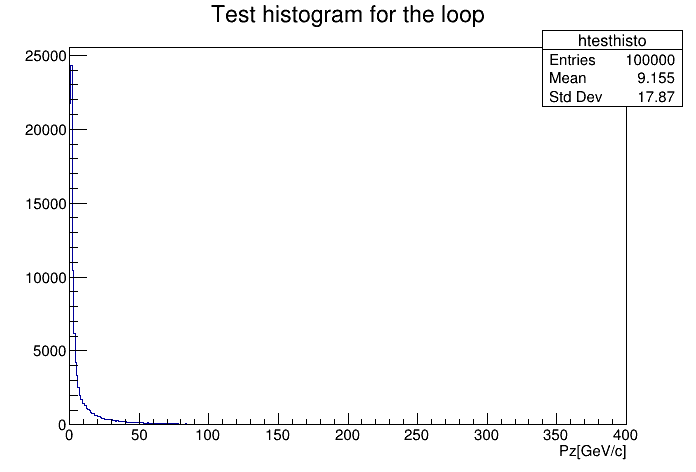

In [8]:
TH1D *htesthisto = (TH1D*) histfile->Get("htesthisto");
TCanvas *c = new TCanvas();
htesthisto->Draw();
c->Draw();